In [85]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [86]:
data = pd.read_csv(r"C:\Users\Pavel Cristina\Desktop\proiect serii de timp\date.csv", parse_dates=["Date"],index_col='Date')

In [87]:
data.head()
data.describe()


,Corn,Oil,Soybeans
count,180.000000,180.000000,180.000000
mean,189.397944,74.018833,432.461722
std,58.075959,23.769791,97.851783
min,95.370000,21.040000,255.750000
25%,158.507500,56.037500,375.507500
50%,167.230000,68.630000,411.500000
75%,217.992500,99.442500,509.500000
max,333.050000,132.830000,684.000000


In [88]:
print(min(data.index))
print(max(data.index))
data.shape
type(data.index)

2005-05-01 00:00:00
2020-04-01 00:00:00


pandas.core.indexes.datetimes.DatetimeIndex

c:\users\pavel cristina\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\pavel cristina\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\pavel cristina\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.

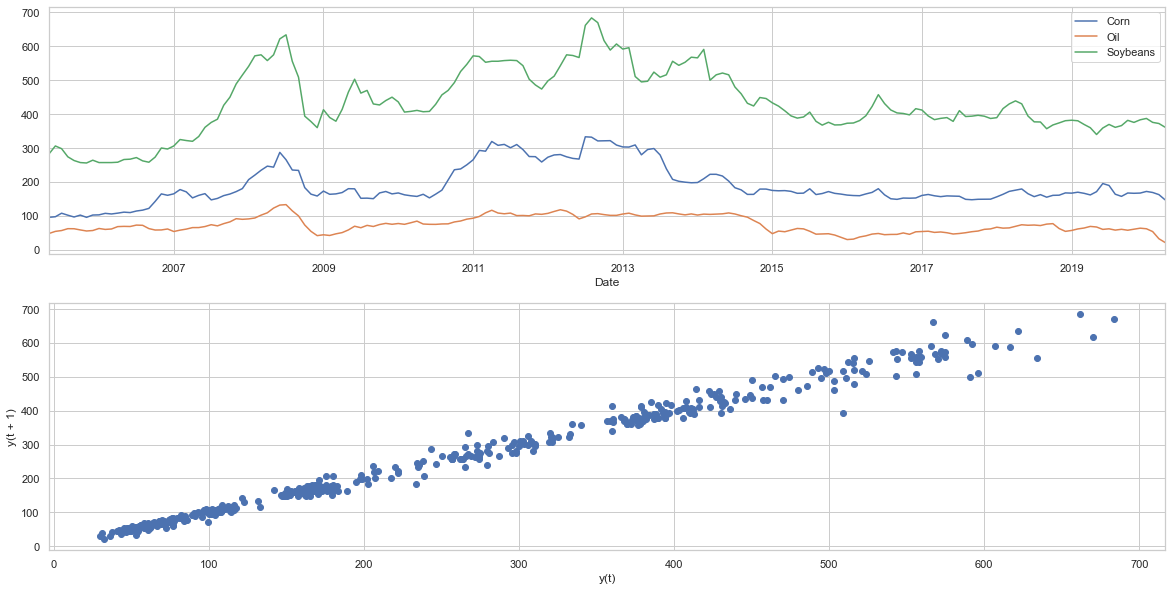

In [89]:
# testam existenta corelatiei pt X(t) and X(t-1)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
data.plot(ax=ax1) # series plot
pd.plotting.lag_plot(data) # lag plot
#Graficul seriilor de timp indică clar un fel de relație între serii. 
#Datele prezintă aici un pattern liniar, care indică prezența autocorelației pozitive.
#Sugerează că un model AR ar fi o alegere bună pentru previziune.
#De asemenea, nu vedem niciun outlier în date. 


Correlation of Corn and Oil - monthly prices:  0.7525725917416014


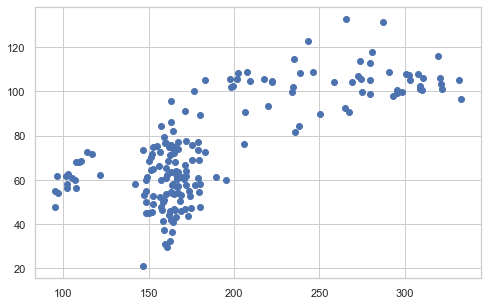

In [90]:
# #Analiza corelatiei dintre serii
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
correlation = data['Corn'].corr(data['Oil'])
print("Correlation of Corn and Oil - monthly prices: ", correlation)
plt.scatter(data['Corn'],data['Oil'])

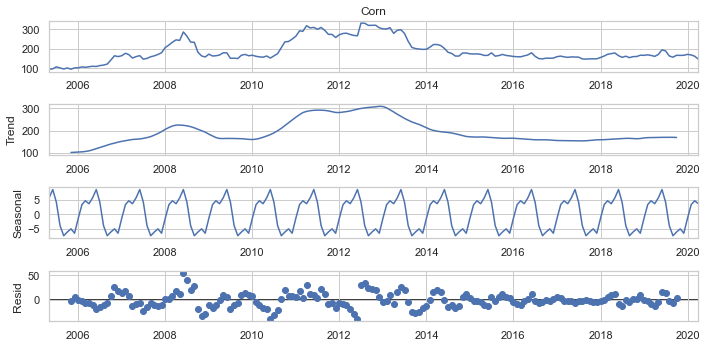

In [91]:
#Descompunerea in componente pret porumb

from pylab import rcParams
y = data['Corn']
rcParams['figure.figsize'] = 10,5
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()



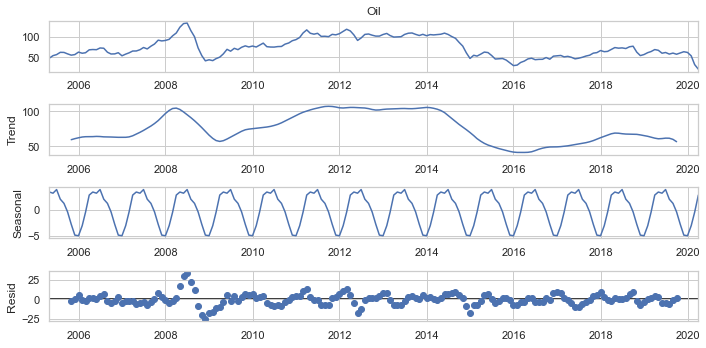

In [92]:
#Descompunerea in componente pret ulei
y = data['Oil']
rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()


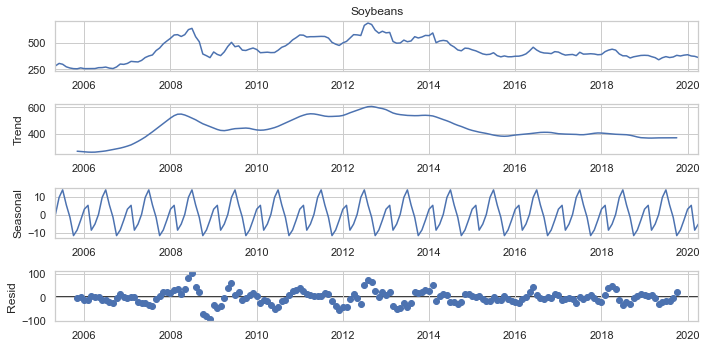

In [93]:
#Descompunerea in componente pret soia
y = data['Soybeans']
rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

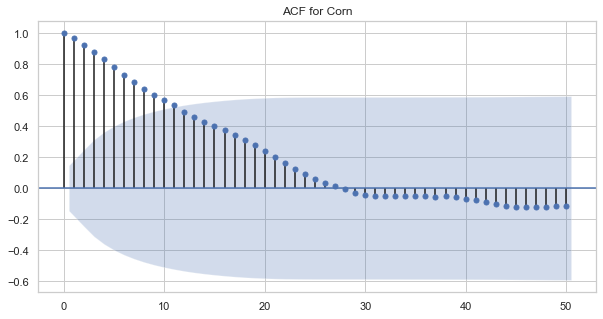

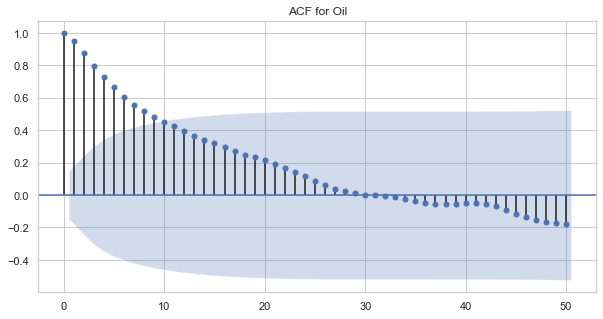

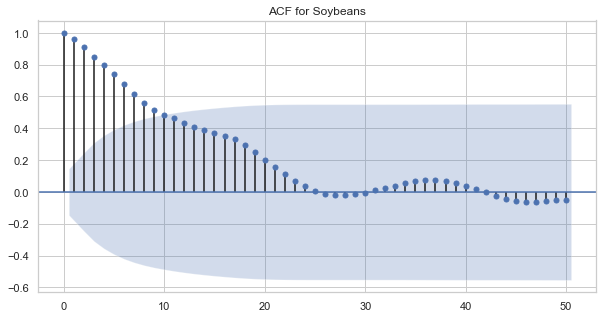

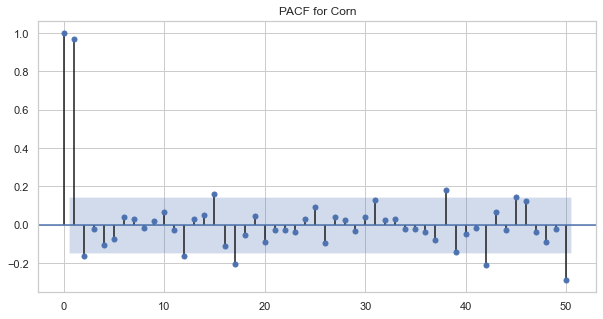

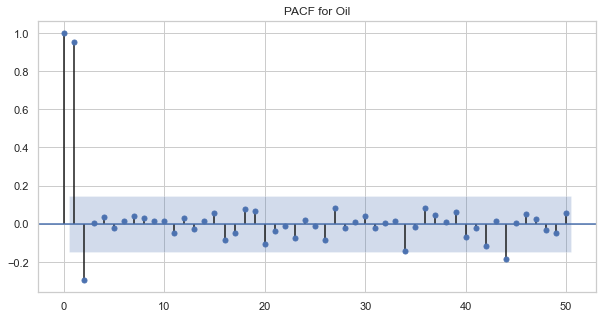

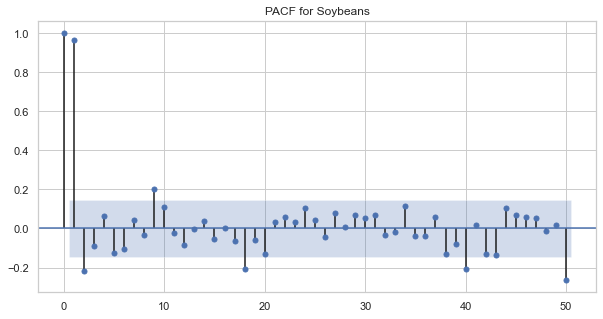

In [94]:
# plots the autocorrelation plots for each stock’s price at 50 lags
for i in data:
    plot_acf(data[i], lags = 50,alpha=0.05)
    plt.title("ACF for %s" % i)
    plt.show()
    
for i in data:
    plot_pacf(data[i], lags=50,alpha=0.05)
    plt.title("PACF for %s" %i)
    plt.show()

In [95]:
from statsmodels.tsa.stattools import adfuller

results={}

for col in data.columns.values:
    results[col] = adfuller(data[col])
    
    print(results)
    
    #serii nestationare (p-value >0.05)

{'Corn': (-2.130621985344865, 0.2323809138808916, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1328.5031685392105)}
{'Corn': (-2.130621985344865, 0.2323809138808916, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1328.5031685392105), 'Oil': (-2.385100256726719, 0.14598598610125696, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1038.1950756761257)}
{'Corn': (-2.130621985344865, 0.2323809138808916, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1328.5031685392105), 'Oil': (-2.385100256726719, 0.14598598610125696, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1038.1950756761257), 'Soybeans': (-2.249980400373571, 0.18860778497992126, 8, 171, {'1%': -3.4691814633722453, '5%': -2.878595143532943, '10%': -2.5758625549741803}, 1520.4085959516824)}


In [96]:
#prima diferenta
data_diff=data.diff(periods=1)
data_diff=data_diff[1:]
data_diff.head()


,Corn,Oil,Soybeans
Date,,,
2005-06-01,1.68,6.06,23.0
2005-07-01,10.42,2.48,-8.0
2005-08-01,-5.85,5.52,-24.0
2005-09-01,-5.32,-0.20,-11.0
2005-10-01,5.59,-3.50,-6.0


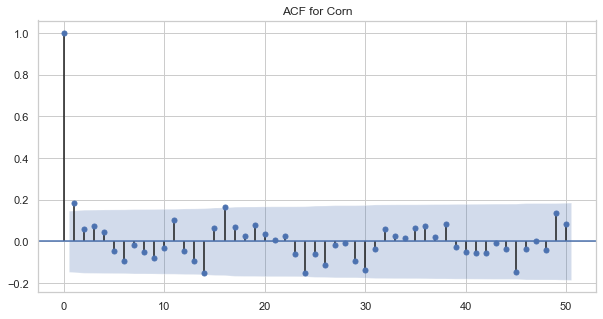

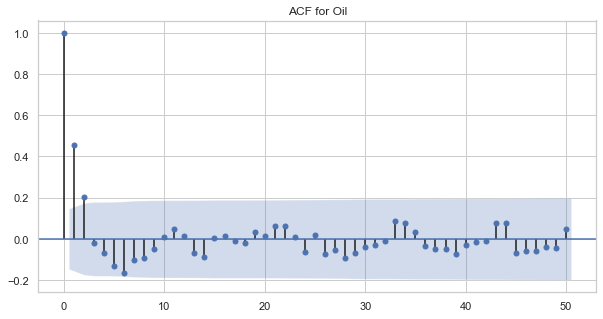

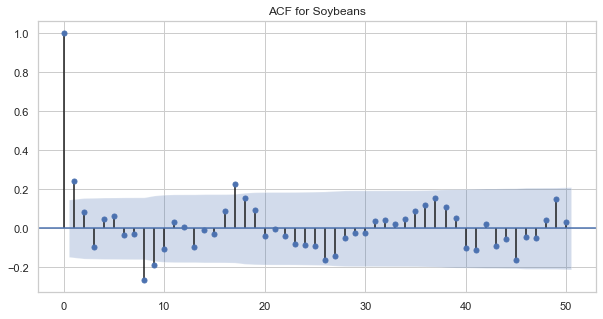

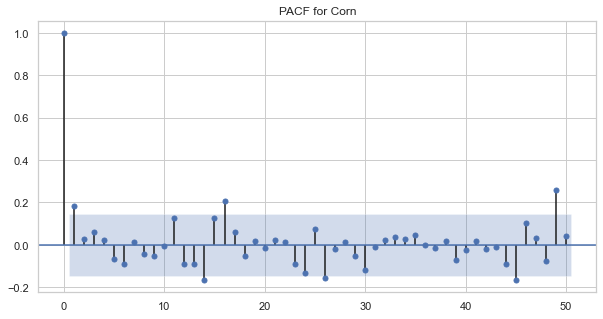

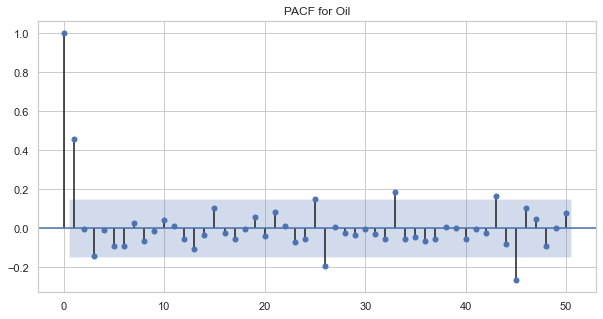

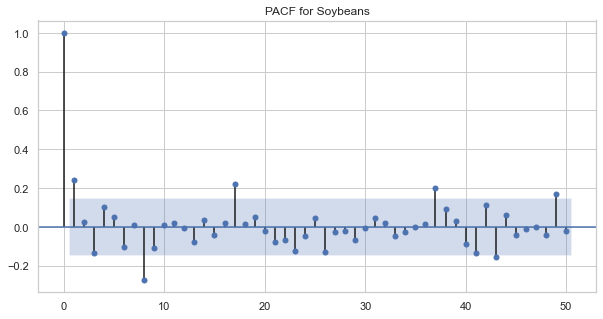

In [97]:
# plots the autocorrelation plots for each stock’s price at 50 lags
for i in data_diff:
    plot_acf(data_diff[i], lags = 50,alpha=0.05)
    plt.title("ACF for %s" % i)
    plt.show()
    
for i in data_diff:
    plot_pacf(data_diff[i], lags=50,alpha=0.05)
    plt.title("PACF for %s" %i)
    plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller

results={}

for col in data_diff.columns.values:
    results[col] = adfuller(data_diff[col])
    
    print(results)
    
    #serii stationare (p-value < 0.05)

{'Corn': (-10.967989524118343, 8.012698286005594e-20, 0, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1324.1166442879908)}
{'Corn': (-10.967989524118343, 8.012698286005594e-20, 0, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1324.1166442879908), 'Oil': (-6.728341133696604, 3.345023985381208e-09, 2, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 1035.409592161292)}
{'Corn': (-10.967989524118343, 8.012698286005594e-20, 0, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 1324.1166442879908), 'Oil': (-6.728341133696604, 3.345023985381208e-09, 2, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 1035.409592161292), 'Soybeans': (-5.807694879314001, 4.4763758596080306e-07, 7, 171, {'1%': -3.4691814633722453, '5%': -2.878595143532943, '10%': -2.5758625549741803}, 1515.963892647745)}


In [99]:
#Regresia liniara: pretul boabelor de soia in functie de pretul porumbului
#R-squared mai mare decat DW - regresie falsa sau cointegrare?
y=data[['Soybeans']]
x=data[['Corn']]
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model_prediction=model.predict(x)

model_details=model.summary()
print(model_details)


                            OLS Regression Results                            
Dep. Variable:               Soybeans   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     569.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.27e-57
Time:                        11:58:10   Log-Likelihood:                -950.75
No. Observations:                 180   AIC:                             1906.
Df Residuals:                     178   BIC:                             1912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.9046     12.203     12.612      0.0

Respingem ipoteza nula => Seria nu prezinta o radacina unitate => Este stationara. P-value: 0.006972622753929566


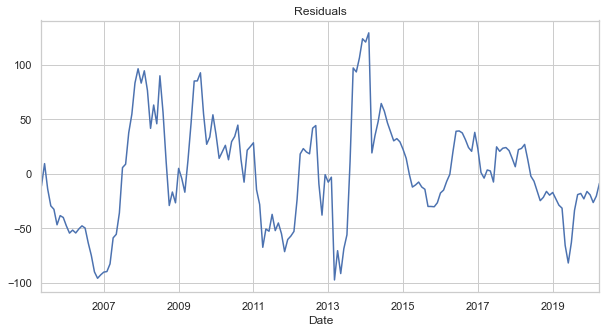

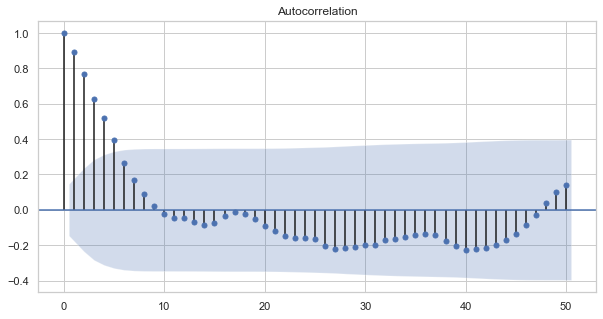

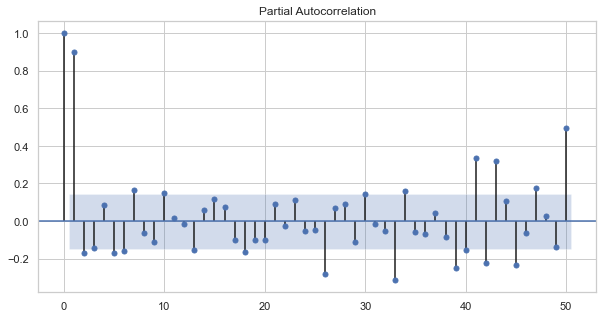

In [100]:
#testare reziduuri
resid1=model.resid
resid1.plot(title='Residuals')

plot_acf(resid1, lags= 50, alpha=0.05)
plot_pacf(resid1, lags= 50, alpha=0.05)

results = adfuller(resid1)

if(results[1]>0.05):
    print("Nu putem respunge ipoteza nula => Seria prezinta o radacina unitate => Este nestationara. P-value:",results[1])
   
else:
  print("Respingem ipoteza nula => Seria nu prezinta o radacina unitate => Este stationara. P-value:",results[1])
#reziduuri stationare = serii cointegrate

                            OLS Regression Results                            
Dep. Variable:               Soybeans   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           3.68e-36
Time:                        11:58:12   Log-Likelihood:                -1000.0
No. Observations:                 180   AIC:                             2004.
Df Residuals:                     178   BIC:                             2010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.7024     15.383     12.917      0.0

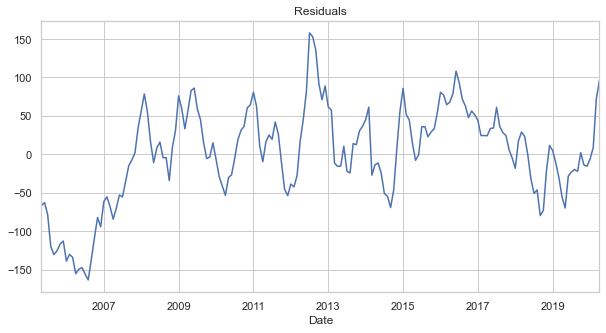

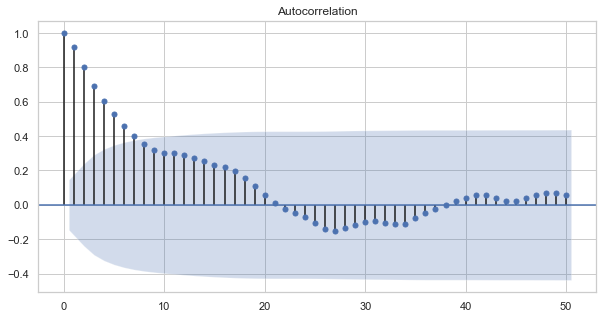

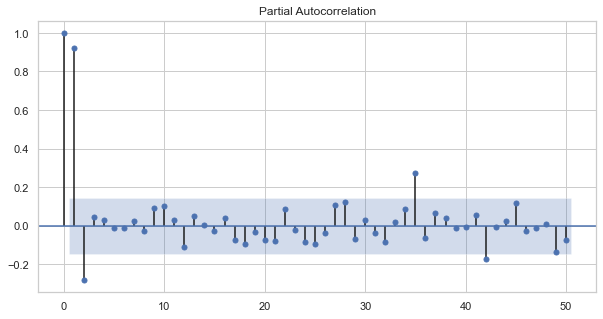

In [101]:
#Regresia liniara: pretul boabelor de soia in functie de pretul uleiului
#R-squared mai mare decat DW - regresie falsa sau cointegrare?

y=data[['Soybeans']]
x=data['Oil']
x= sm.add_constant(x)

model2 = sm.OLS(y,x).fit()
model_prediction2=model2.predict(x)

model_details2=model2.summary()
print(model_details2)

#testare reziduuri
resid2=model2.resid
resid2.plot(title='Residuals')



plot_acf(resid2, lags= 50, alpha=0.05)
plot_pacf(resid2, lags= 50, alpha=0.05)


results = adfuller(resid2)

if(results[1]>0.05):
    print("Nu putem respunge ipoteza nula => Seria prezinta o radacina unitate => Este nestationara. P-value:",results[1])
   
else:
  print("Respingem ipoteza nula => Seria nu prezinta o radacina unitate => Este stationara. P-value:",results[1])
#serii cointegrate

In [102]:
#pregatire pentru model VAR - cu datele stationarizate
#train test split

nobs = 10
X_train, X_test = data[0:-nobs], data[-nobs:]

# Check size

print(X_train.shape)
print(X_test.shape)
X_train


(170, 3)
(10, 3)


,Corn,Oil,Soybeans
Date,,,
2005-05-01,95.42,47.83,283.00
2005-06-01,97.10,53.89,306.00
2005-07-01,107.52,56.37,298.00
2005-08-01,101.67,61.89,274.00
2005-09-01,96.35,61.69,263.00
...,...,...,...
2019-02-01,169.52,61.13,380.33
2019-03-01,166.22,63.79,369.53
2019-04-01,161.49,68.58,359.84


In [103]:
X_train_diff=X_train.diff().dropna()
X_train_diff.head()

,Corn,Oil,Soybeans
Date,,,
2005-06-01,1.68,6.06,23.0
2005-07-01,10.42,2.48,-8.0
2005-08-01,-5.85,5.52,-24.0
2005-09-01,-5.32,-0.20,-11.0
2005-10-01,5.59,-3.50,-6.0


In [104]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)    

,Corn_x,Oil_x,Soybeans_x
Corn_y,1.0000,0.5965,0.0278
Oil_y,0.0010,1.0000,0.1102
Soybeans_y,0.0016,0.5059,1.0000


In [105]:
#testare cointegrare fol Johansen
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(X_train_diff)
#respingem ipoteza nula

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Corn   ::  118.08    > 24.2761   =>   True
Oil    ::  70.47     > 12.3212   =>   True
Soybeans ::  30.77     > 4.1296    =>   True


In [106]:
# model VAR 
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(X_train_diff)
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#am ales lag 1 pentru ca AIC are cele mai mici valori

Lag Order = 1
AIC :  14.510389967805132
BIC :  14.733530252048222
FPE :  2003521.563500878
HQIC:  14.600951161266417 

Lag Order = 2
AIC :  14.597579389427036
BIC :  14.989662443683034
FPE :  2186312.374746934
HQIC:  14.756717270909638 

Lag Order = 3
AIC :  14.631663244917277
BIC :  15.194070676547978
FPE :  2262772.581138447
HQIC:  14.859948182840135 

Lag Order = 4
AIC :  14.687549029000225
BIC :  15.421681595558544
FPE :  2394130.906326628
HQIC:  14.985558967877907 

Lag Order = 5
AIC :  14.738522826222692
BIC :  15.645800805098066
FPE :  2521566.022417188
HQIC:  15.106843420621477 

Lag Order = 6
AIC :  14.733002574191108
BIC :  15.814866141344393
FPE :  2511011.5392925753
HQIC:  15.172227325521973 

Lag Order = 7
AIC :  14.834998516448708
BIC :  16.092908134506345
FPE :  2785850.3214654857
HQIC:  15.345728912661905 

Lag Order = 8
AIC :  14.841425684084768
BIC :  16.27686250007132
FPE :  2810924.608568678
HQIC:  15.424271342331922 

Lag Order = 9
AIC :  14.89763806729632
BIC :  1

c:\users\pavel cristina\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [107]:
model_fitted = model.fit(5)
model_fitted.summary()
#pretul uleiului cauzat de porumb pt un interval de incredere de 93% este semnificativ

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jun, 2020
Time:                     11:58:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    15.6458
Nobs:                     164.000    HQIC:                   15.1068
Log likelihood:          -1858.68    FPE:                2.52157e+06
AIC:                      14.7385    Det(Omega_mle):     1.90715e+06
--------------------------------------------------------------------
Results for equation Corn
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.449394         1.057827            0.425           0.671
L1.Corn             0.126039         0.096455            1.307           0.191
L1.Oil             -0.272769         0.226418           -1.205       

In [108]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

def adjust(val, length= 6): return str(val).ljust(length)

for col, val in zip(X_train_diff.columns, out):
    print(adjust(col), ':', round(val, 2))
    
#nu exista autocorelare a erorilor

Corn   : 2.03
Oil    : 2.04
Soybeans : 2.01


In [109]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  
print(X_train)
# Input data for forecasting
forecast_input = X_train_diff.values[-lag_order:]
forecast_input

5
              Corn    Oil  Soybeans
Date                               
2005-05-01   95.42  47.83    283.00
2005-06-01   97.10  53.89    306.00
2005-07-01  107.52  56.37    298.00
2005-08-01  101.67  61.89    274.00
2005-09-01   96.35  61.69    263.00
...            ...    ...       ...
2019-02-01  169.52  61.13    380.33
2019-03-01  166.22  63.79    369.53
2019-04-01  161.49  68.58    359.84
2019-05-01  171.08  66.83    339.81
2019-06-01  195.08  59.76    358.95

[170 rows x 3 columns]


array([[  2.78,   4.55,  -1.63],
       [ -3.3 ,   2.66, -10.8 ],
       [ -4.73,   4.79,  -9.69],
       [  9.59,  -1.75, -20.03],
       [ 24.  ,  -7.07,  19.14]])

In [110]:
# Previziune
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
data_forecast = pd.DataFrame(fc, index=data.index[-nobs:], columns=data.columns + '_1d')
data_forecast

,Corn_1d,Oil_1d,Soybeans_1d
Date,,,
2019-07-01,4.247991,-3.260846,5.863781
2019-08-01,2.026735,-1.069265,3.796313
2019-09-01,1.254114,-1.453914,-7.817560
2019-10-01,-2.173443,-0.964706,-15.023262
2019-11-01,-0.102113,2.035578,-4.147250
2019-12-01,0.690932,1.436568,1.472301
2020-01-01,-0.488609,0.481514,2.399951
2020-02-01,-1.685979,-0.394421,-1.206005
2020-03-01,-0.591645,-0.837287,-1.412145


In [111]:
#functie pentru de-diferentiere 

def invert_transformation(df_train, df_forecast):
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [112]:
#transform rezultatele
df_results = invert_transformation(X_train, data_forecast)
df_results.loc[:, ['Corn_forecast',
                   'Oil_forecast', 'Soybeans_forecast']]

,Corn_forecast,Oil_forecast,Soybeans_forecast
Date,,,
2019-07-01,199.327991,56.499154,364.813781
2019-08-01,201.354727,55.429889,368.610093
2019-09-01,202.608840,53.975974,360.792533
2019-10-01,200.435398,53.011268,345.769271
2019-11-01,200.333285,55.046847,341.622021
2019-12-01,201.024216,56.483414,343.094322
2020-01-01,200.535607,56.964928,345.494273
2020-02-01,198.849628,56.570507,344.288268
2020-03-01,198.257984,55.733220,342.876123


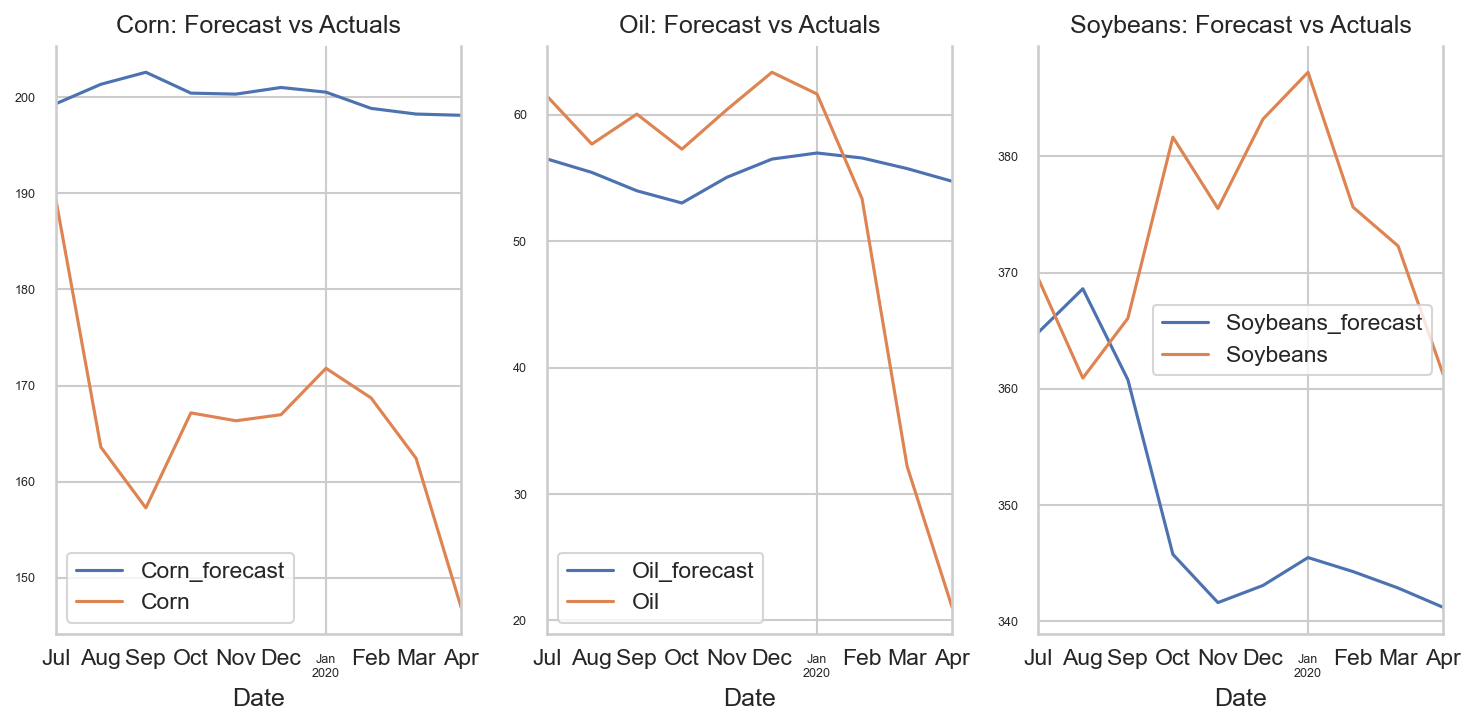

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150, figsize=(10,5))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    X_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [114]:
#Evaluare previziune

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [115]:
print('Forecast Accuracy of: Corn')
accuracy_prod = forecast_accuracy(df_results['Corn_forecast'].values, X_test['Corn'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Corn
mape   :  0.2094
me     :  34.0316
mae    :  34.0316
mpe    :  0.2094
rmse   :  35.5637


In [116]:
print('Forecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, X_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Oil
mape   :  0.296
me     :  2.6015
mae    :  9.4872
mpe    :  0.1824
rmse   :  13.7167


In [117]:
print('Forecast Accuracy of: Soybeans')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, X_test['Soybeans'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Soybeans
mape   :  0.8514
me     :  -317.8905
mae    :  317.8905
mpe    :  -0.8514
rmse   :  317.9999


In [118]:
#vecm - date nestationarizate
from statsmodels.tsa.vector_ar.vecm import *
vecm = VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = "ci")
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)


c:\users\pavel cristina\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


array([[199.70917397,  56.62610577, 376.42896693],
       [199.54505847,  56.6386247 , 383.12619819],
       [198.46064161,  57.52214711, 379.77802939],
       [197.23374484,  58.89814799, 372.48447432],
       [193.19589112,  64.52545753, 383.87549477],
       [193.34407513,  70.18511747, 401.67875396],
       [198.98661366,  72.39103887, 423.76017913],
       [199.8112196 ,  71.63340164, 429.60051509],
       [200.44576564,  72.42640807, 432.4802466 ],
       [202.82804444,  73.92945065, 439.61283391]])

In [119]:
model=coint_johansen(endog=X_train, det_order=-1,k_ar_diff=10)
print("\n normlized eigenvector 0\n", model.evec[:,0]/model.evec[:,0][0])
print("\n normlized eigenvector 1\n", model.evec[:,1]/model.evec[:,1][0])
print("\ntest statistics\n",model.lr1[0],model.lr1[1])
print("\critical values \n",model.cvt[0],model.cvt[1])
print("\neig\n",model.eig) #valori proprii ale matricei de coeficienti ai VECM)
print("\n nevec \n", model.evec)
print("\n nlr1 \n", model.lr1)
print("\n nlr2 \n", model.lr2)
print("\n ncvt \n", model.cvt)
print("\n nind\n", model.ind) #ordinea valorilor proprii
      


 normlized eigenvector 0
 [ 1.         -1.33721318 -0.2152411 ]

 normlized eigenvector 1
 [ 1.          4.35320546 -1.17068129]

test statistics
 22.404911987184484 5.573489584387491
\critical values 
 [21.7781 24.2761 29.5147] [10.4741 12.3212 16.364 ]

eig
 [0.10044763 0.03427036 0.00018201]

 nevec 
 [[ 0.04502729  0.01533989 -0.00077381]
 [-0.06021108  0.06677769  0.01466663]
 [-0.00969172 -0.01795812 -0.00437661]]

 nlr1 
 [22.40491199  5.57348958  0.02894289]

 nlr2 
 [16.8314224   5.54454669  0.02894289]

 ncvt 
 [[21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]

 nind
 [0 1 2]


In [120]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print("lower bounds of confidence intervals:")
print(lower.round(3))
print("\npoint forecasts:")
print(forecast.round(3))
print("\nupper bounds of confidence intervals:")
print(upper.round(3))

print(type(forecast))
forecast_df = pd.DataFrame(forecast)
forecast_df=forecast_df.rename(columns={0:'Corn_f',1:'Oil_f',2:'Soybeans_f'})
print(forecast_df)

lower bounds of confidence intervals:
[[175.875  47.181 334.943]
 [163.995  40.958 319.204]
 [154.066  36.535 298.758]
 [145.025  34.132 280.889]
 [133.841  37.005 283.429]
 [128.361  40.582 293.198]
 [129.33   41.065 309.071]
 [125.836  38.791 308.881]
 [123.171  38.636 309.16 ]
 [122.934  39.448 315.126]]

point forecasts:
[[199.709  56.626 376.429]
 [199.545  56.639 383.126]
 [198.461  57.522 379.778]
 [197.234  58.898 372.484]
 [193.196  64.525 383.875]
 [193.344  70.185 401.679]
 [198.987  72.391 423.76 ]
 [199.811  71.633 429.601]
 [200.446  72.426 432.48 ]
 [202.828  73.929 439.613]]

upper bounds of confidence intervals:
[[223.543  66.071 417.915]
 [235.095  72.319 447.048]
 [242.855  78.509 460.798]
 [249.442  83.664 464.08 ]
 [252.551  92.046 484.322]
 [258.327  99.788 510.16 ]
 [268.643 103.717 538.449]
 [273.786 104.476 550.32 ]
 [277.72  106.217 555.801]
 [282.722 108.411 564.1  ]]
<class 'numpy.ndarray'>
       Corn_f      Oil_f  Soybeans_f
0  199.709174  56.626106  376.4

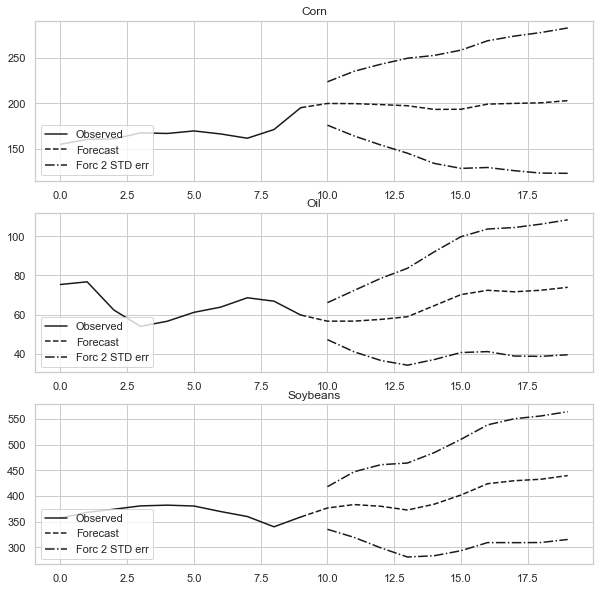

In [121]:
vecm_fit.plot_forecast(steps=10,n_last_obs=10)

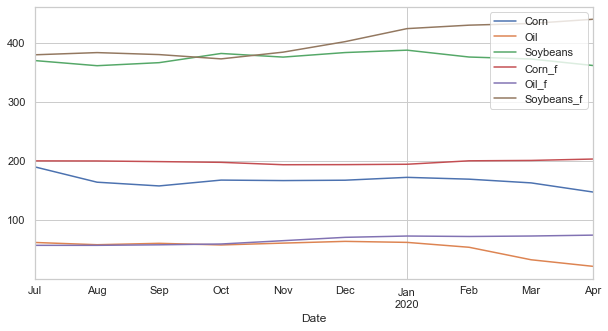

In [122]:
proiectii = pd.read_csv(r"C:\Users\Pavel Cristina\Desktop\proiect serii de timp\proiectii_vs_actual.csv", parse_dates=["Date"],index_col='Date')
actual=proiectii[['Corn','Oil','Soybeans']]
proiectii_f=proiectii[['Corn_f','Oil_f','Soybeans_f']]

proiectii.plot()
# la ulei pana in noiembrie
# la soia pana in octombrie-noiembrie
#la porumb nu

In [123]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [124]:
print('Forecast Accuracy of: Corn')
accuracy_prod = forecast_accuracy(forecast_df['Corn_f'].values, X_test['Corn'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Corn
mape   :  0.1993
me     :  32.302
mae    :  32.302
mpe    :  0.1993
rmse   :  34.2035


In [125]:
print('Forecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(forecast_df['Oil_f'].values, X_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Oil
mape   :  0.4624
me     :  12.6346
mae    :  14.3152
mpe    :  0.4346
rmse   :  22.2776


In [126]:
print('Forecast Accuracy of: Soybeans')
accuracy_prod = forecast_accuracy(forecast_df['Soybeans_f'].values, X_test['Soybeans'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Soybeans
mape   :  0.0829
me     :  28.9476
mae    :  30.7807
mpe    :  0.0781
rmse   :  39.0285
